#### Цель проекта: Выявить определяющие успешность игры закономерности.

#### Описание данных
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг

### <span style="color:blue">Шаг_1. Открываем файл и изучаем общую информацию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

### Итоги Шага_1
- В названии есть 2 пропуска - будем удалять такие строки, игра без названия - явно не поможет оценить успешность игры :)
- Year_of_Release - имеет 267 пропусков, заполним пропуска годами запуска в других платформах, при совпадении + Переведем в формат int
- Critic_Score - переведем в int
- User_Score - избавимся от текстового поля "tbd" (рейтинг не определен) и переведем поле в формат float
- Возрастной рейтинг проставлен не везде, изменений не требуется.
---
---


### <span style="color:blue"> Шаг_2. Подготовка данных

#### a. Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### b. Заменим типы данных

In [7]:
# year_of_release - int (Это года, а в годах запятые никчему)
# critic_score - int (Поле имеет целочисленные данные, думаю его можно привести к int)
# user_score - избавимся от текстового поля "tbd" и переведем поле в формат float (Поле числовое, но из-за наличия 
#              в нем текстового поля в данный момент является 'object')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
# data['critic_score'] = data['critic_score'].astype('Int64')
# Не буду переводить в Int там потом из-за этого такие проблемы начинаются :)

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [10]:
data.sort_values(by='user_score', ascending=False)['user_score'].unique()

array(['9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9', '8.8',
       '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9', '7.8',
       '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9', '6.8',
       '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9', '5.8',
       '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9', '4.8',
       '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9', '3.8',
       '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9', '2.8',
       '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9', '1.8',
       '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9', '0.7',
       '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

In [11]:
data['user_score'] = data['user_score'].astype('float64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### c. Обработка пропусков

Работаем со столбцом 'Year_of_Release', заполним пропуски по аналогичным играм но запущенным в других платформах


In [13]:
# 1. Отбираем игры с непустыми значениями
release_year = data.filter(items=['name', 'year_of_release']).query('year_of_release == year_of_release')

In [14]:
# 2. Убираем дубликаты
release_year = release_year.drop_duplicates().reset_index(drop=True)

In [15]:
# 3. Считаем кол-во строк
release_year['name'].count()

12195

In [17]:
# 4. Проверяем кол-во уникальных игр. Оказывается у нас есть игры с разными годами запуска :(
release_year['name'].nunique()

11426

In [18]:
# 5. Воспользуемся методом группировки groupby first
release_year = release_year.groupby('name', as_index=False).first()
release_year = release_year.rename(columns={'year_of_release':'yy_add'})

In [19]:
# 6. Теперь можно к пустым значениям добавить данные из таблички 'release_year'
# Сначала добавим новый столбец
data = data.merge(release_year, on='name', how='left')

In [20]:
# 7. Теперь проставим в пустые значения годов то что нашли и удалим лишний столбец с годом
data.loc[(data['year_of_release'] != data['year_of_release']) & (data['yy_add'] == data['yy_add']), 'year_of_release'] = data['yy_add']

In [21]:
del data['yy_add']

In [22]:
# Удаляем 2 пустые строки с отсутствующими названиями игр, такие строки нам явно не помогут в анализе
data.drop(data.query('name != name').index,inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### d. Возможные причины пропусков

- **Год выпуска** - данные могли быть взяты из старых источников в которых это поле не было указано, или данные могли быть не заполнены оператором, при добавлении данных.
- **Рейтинги** - могли быть не проставлены по 2 причинам, либо игра не поподала в такой рейтинг, либо это новая игра и данные находяться на уточнении **tbd**

#### e. Посчитаем суммарные продажи во всех регионах и добавим их в нов. столбец 'all_sales'

In [24]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


---
---

### <span style="color:blue"> Шаг_3. Исследовательский анализ данных

#### 3.1. Посмотрим сколько игр выпускалось за разные годы и насколько прошлые года важны для текущего анализа

In [26]:
# Судя по выгрузке адекватные данные по играм можно смотреть с 1994 года.
# Но насколько это пересекается пересекается с Платформами, ведь многе из них уже закончили свои продажи, а многие начали 
# продаваться гораздо позже 1994 года
data['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     548
2012     662
2011    1153
2010    1269
2009    1430
2008    1441
2007    1202
2006    1019
2005     947
2004     764
2003     783
2002     845
2001     486
2000     351
1999     339
1998     380
1997     289
1996     263
1995     219
1994     122
1993      60
1992      43
1991      42
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
NaN      146
Name: year_of_release, dtype: int64

#### Добавляем диаграмму по годам с накоплением и подписями

Text(0.5, 1.0, 'Количество игр по годам')

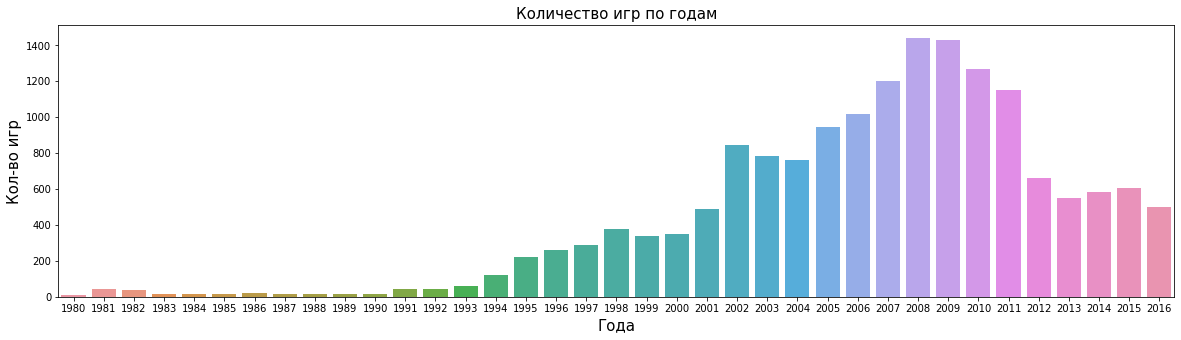

In [27]:
year_data = data.groupby('year_of_release', as_index=False).agg({'name':'count'})
plt.rcParams['figure.figsize']=(20,5)
ax = sns.barplot(x="year_of_release", y="name", data=year_data)
ax.set_ylabel('Кол-во игр', fontsize = 15)
ax.set_xlabel('Года', fontsize = 15)
ax.set_title('Количество игр по годам', fontsize = 15)

#### 3.2. Помотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим характерный срок появления новых и исчезновения старых платформ

In [28]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 30

In [29]:
# Посмотрим распределение по платформам за последние годы
pd.options.display.max_rows = 30
data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum', fill_value = '-').sort_index(ascending=False)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,-,-,15.14,-,-,-,-,-,-,-,-,-,-,5.25,-,-,-,3.6,69.25,-,4.25,-,-,-,-,-,0.18,4.6,1.52,-,26.15
2015,-,-,27.78,-,-,-,-,-,-,-,-,-,-,8.52,-,-,-,16.82,118.9,0.12,6.25,-,-,-,-,-,1.14,16.35,11.96,-,60.14
2014,-,-,43.76,-,-,-,-,-,-,-,-,-,-,13.28,-,-,-,47.76,100,0.24,11.9,-,-,-,-,-,3.75,22.03,34.74,-,54.07
2013,-,-,56.57,-,1.54,-,-,-,-,-,-,-,-,13.01,-,-,-,113.25,25.99,3.38,10.59,-,-,-,-,-,8.59,21.65,88.58,-,18.96
2012,-,-,51.76,-,11.67,-,-,-,-,-,-,-,-,23.45,-,-,-,108.28,-,7.95,16.19,-,-,-,-,-,22.94,17.56,100.72,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.27,-,-,-,-,-,-,-,-,-,-,50.08,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1983,5.84,-,-,-,-,-,-,-,-,-,-,10.96,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1982,28.88,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


Получается что многие платформы уже просто не существуют и для построения прогноза продаж на 2017 год, данные по ним совсем не нужны.

In [30]:
# Посчитаем кол-во продаж по платформам и отберем первые 12
top_sales = data.groupby('platform', as_index=False).agg({'all_sales':'sum'})\
                .sort_values('all_sales', ascending=False)\
                .head(12)\
                .set_index('platform')

# Топ 6 платформ уходят далеко вперед, с продажами более 730 млн копий
# Но если смотреть по последним годам то самые большие продажи у PS2, а она не продавалась последние 5 лет 
# и для нашего анализа она явно не подойдет.

In [31]:
top_sales.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB'],
      dtype='object', name='platform')

In [32]:
# Отберем данные только по нужным нам платформам и посмотрим распределение по годам
only_top = data.query('platform in @top_sales.index and year_of_release>1993')

In [33]:
only_top.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [34]:
pvt = only_top.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum', fill_value=0)\
        .reset_index()

In [35]:
pvt

platform,year_of_release,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
0,1994,0.00,0.00,0.00,12.87,6.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1995,0.00,0.00,0.00,4.22,35.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1996,0.00,0.00,0.00,10.58,94.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1997,0.00,0.00,0.00,11.27,136.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1998,0.00,0.00,0.00,3.26,169.49,0.95,0.00,0.00,0.00,0.00,0.00,0.00
5,1999,0.00,0.00,0.00,4.74,144.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2000,0.02,0.00,0.07,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.00,0.99
7,2001,0.00,0.00,61.53,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.00,23.82
8,2002,0.00,0.00,74.16,8.57,6.67,208.36,0.00,0.00,0.00,0.00,0.00,51.00
9,2003,0.00,0.00,56.67,8.89,2.07,193.05,0.00,0.00,0.00,0.00,0.00,55.05


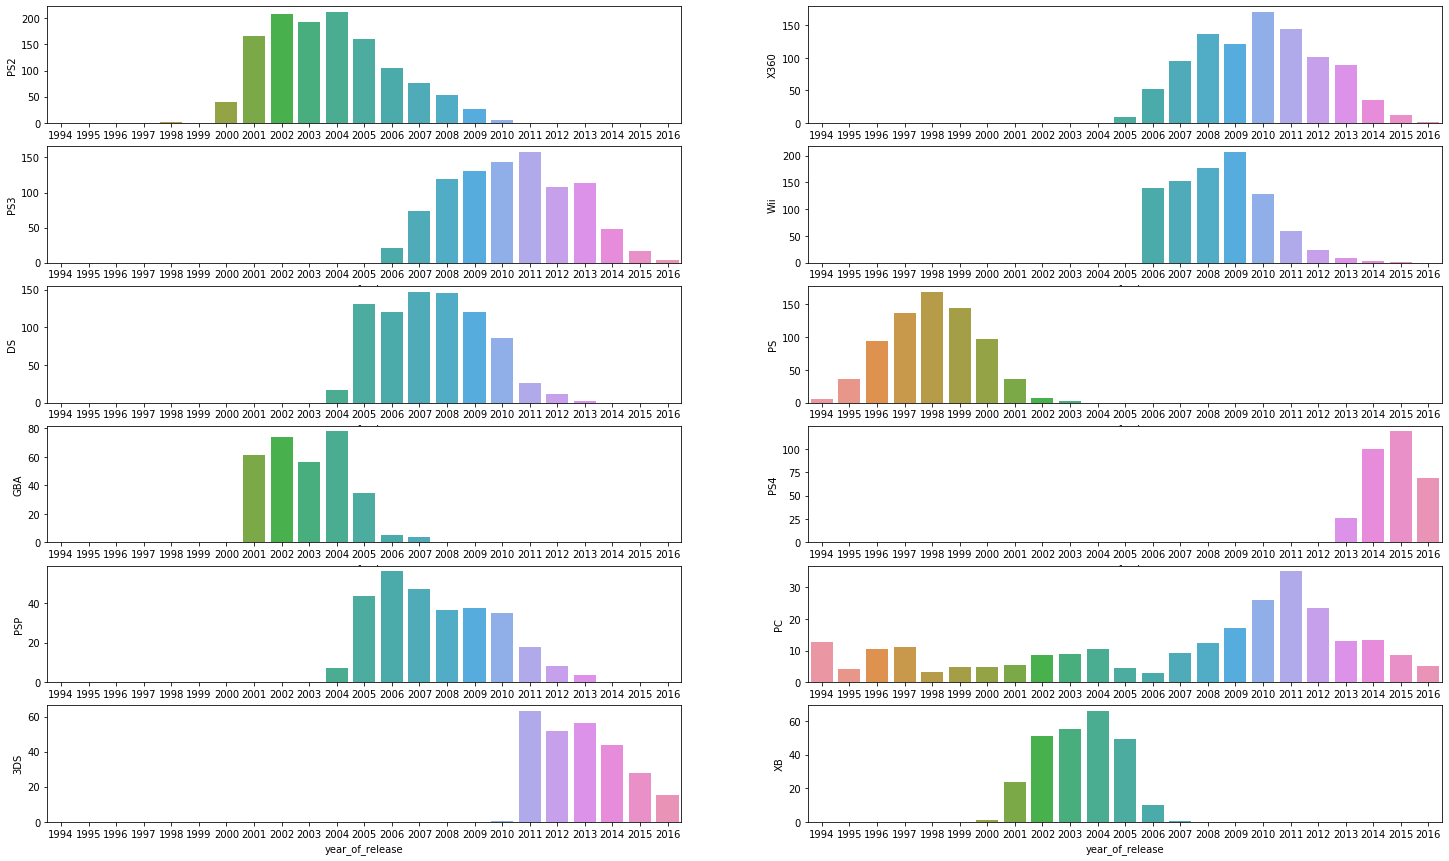

In [36]:
fig, ax = plt.subplots(6,2, figsize=(25, 15))

ax = ax.ravel() 
 
num_of_subplot = 0

for column in top_sales.index:
    sns.barplot(x="year_of_release", y=column, data=pvt, ax=ax[num_of_subplot])
    num_of_subplot += 1  

#### Самая 'живучая' платформа это 'PC' которая стабильно продает игры с 1994 года, остальные платформы живут максимум 12 лет
- Таким образом смотреть платформы с запуском позже 12 лет не имеет смысла, кроме pc

#### 3.3. Отберем данные по кретериям озвученным выше

In [37]:
data_filter = data.query('year_of_release >=2005 | platform == "PC"')

#### Посмотрим на отобранные платформы и определим лидирующий, падающих, растущих, а так же несколько потенциально прибыльных платформ.

In [38]:
data_filter.pivot_table(index='year_of_release'
                        , columns='platform', values='all_sales'
                        , aggfunc='sum', fill_value = '-').sort_index(ascending=False)

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2016,15.14,-,-,-,-,5.25,-,3.6,69.25,-,4.25,0.18,4.6,1.52,-,26.15
2015,27.78,-,-,-,-,8.52,-,16.82,118.9,0.12,6.25,1.14,16.35,11.96,-,60.14
2014,43.76,-,-,-,-,13.28,-,47.76,100,0.24,11.9,3.75,22.03,34.74,-,54.07
2013,56.57,-,1.54,-,-,13.01,-,113.25,25.99,3.38,10.59,8.59,21.65,88.58,-,18.96
2012,51.76,-,11.67,-,-,23.45,-,108.28,-,7.95,16.19,22.94,17.56,100.72,-,-
2011,63.2,-,26.33,-,-,35.16,0.45,157.98,-,17.82,4.63,59.79,-,145.23,-,-
2010,0.3,-,85.35,-,-,26.15,5.64,142.96,-,35.04,-,128.67,-,170.55,-,-
2009,-,-,119.56,-,-,17.05,26.4,130.93,-,37.78,-,206.97,-,120.82,-,-
2008,-,0.04,145.36,-,-,12.46,53.9,118.79,-,36.76,-,177.68,-,136.07,0.18,-


- Лидирующей платформой с запуском в 2016 году является 'PS4' с продажами 69.25
- Платформы которые прекратили совсем выпуск новых продуктов довольно много это:
    - 'DC', 'DS', 'GBA', 'GC', 'PS2', 'PSP' и 'XB'
- Платформы продажи по которым слабеют это:
    - '3DS', 'PC', 'PS3', 'Wii', 'X360'
- Потенциально прибыльные платформы:
    - 'PS4' и возможно 'XOne'
- Так же хочется отметить отсутствие новых запусков платформ, самые последние были запущены 4 года назад

#### 3.4. Строим boxplot-ы, в разбивке по платформам 

Text(0.5, 0, 'Платформы')

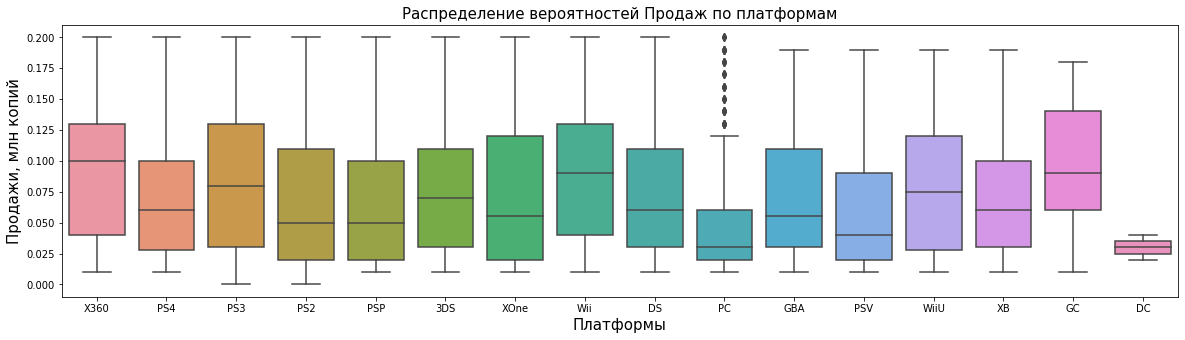

In [39]:
ax = sns.boxplot(x="platform", y="all_sales", data=data_filter.query('all_sales<0.2'))
ax.set_title('Распределение вероятностей Продаж по платформам', fontsize = 15)
ax.set_ylabel('Продажи, млн копий', fontsize = 15)
ax.set_xlabel('Платформы', fontsize = 15)

Получается что большинство игр во всех платформах имеют медианные значения в районе 75 000, но есть и очень популярные игры которые выходят далеко за рамки 3 Сигм.

#### 3.5. 
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построим диаграмму рассеяния 
- Посчитаем корреляцию между отзывами и продажами
- Сформулируем выводы

Еще больше сократим наши данные по платформам, т.к. те платформы которые давно не выпускали новинок вряд-ли могут претендовать на хорошие продажи в 2017 году

In [40]:
data_filter = data_filter.query('platform in ("3DS", "PC", "PS4", "PSV", "XOne")')

Проведем анализ на основе самой перспективной платформе "PS4"

In [41]:
data_filter.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [42]:
ps4_data_user = data_filter.query('user_score>0 and platform == "PS4"').filter(['user_score', 'all_sales']).reset_index(drop=True)

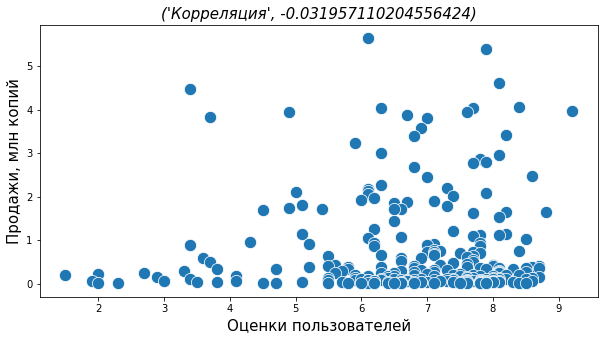

In [43]:
# Строим диаграмму рассеяния по отзывам пользователей 'User_Score'
fig, ax = plt.subplots()
ax = sns.scatterplot('user_score','all_sales', data=ps4_data_user.query('all_sales<6'), s=150)
ax.set_title(("Корреляция", ps4_data_user['user_score'].corr(ps4_data_user['all_sales'])),fontstyle = 'oblique', fontsize = 15)
ax.set_ylabel('Продажи, млн копий', fontsize = 15)
ax.set_xlabel('Оценки пользователей', fontsize = 15)
fig.set_figwidth(10)
fig.set_figheight(5) 

In [44]:
data_filter.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [45]:
# Сделаем тоже самое но по 'critic_score'
ps4_data_critic = data_filter.query('critic_score>0 and platform == "PS4"')\
.filter(['critic_score', 'all_sales']).reset_index(drop=True)

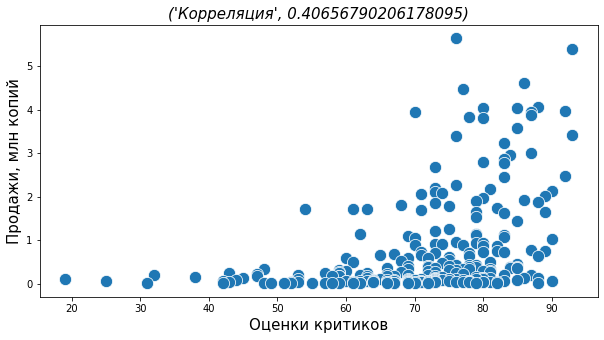

In [46]:
fig, ax = plt.subplots()
ax = sns.scatterplot('critic_score','all_sales', data=ps4_data_critic.query('all_sales<6'), s=150)
ax.set_title(("Корреляция", ps4_data_critic['critic_score'].corr(ps4_data_critic['all_sales'])),fontstyle = 'oblique', fontsize = 15)
ax.set_ylabel('Продажи, млн копий', fontsize = 15)
ax.set_xlabel('Оценки критиков', fontsize = 15)
fig.set_figwidth(10)
fig.set_figheight(5) 

In [47]:
ps4_data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
user_score    257 non-null float64
all_sales     257 non-null float64
dtypes: float64(2)
memory usage: 4.1 KB


In [48]:
# Считаем корреляцию по Пользовательским оценкам
ps4_data_user['user_score'].corr(ps4_data_user['all_sales'])

-0.031957110204556424

In [49]:
ps4_data_critic.head()

,critic_score,all_sales
0,97.0,12.62
1,82.0,8.58
2,83.0,7.66
3,85.0,7.60
4,87.0,7.17


In [50]:
ps4_data_critic['critic_score'] = ps4_data_critic['critic_score'].astype('int')

In [51]:
# Считаем корреляцию по оценкам Критиков
ps4_data_critic['critic_score'].corr(ps4_data_critic['all_sales'])

0.40656790206178095

#### Выводы
Получается что оценки пользователей совсем не коррелируют с продажами, в то время как оценки критиков имеют 40% положительную корреляцию. Хотя возможно что и критики всё подряд не критикуют а только то что хорошо продаётся :)

#### 3.6. Посмотрим как соотносятся полученные выводы PS4 с другими платформами 

In [52]:
# Отберем нужные нам данные
data_rating_critic = data.copy(deep=True).query('platform in ("3DS", "PC", "PS4", "PSV", "XOne") and critic_score>0')
# data_rating_critic = data_filter


In [53]:
# Сначала посмотрим корреляцию продаж с рейтингом критиков
for plat in ["3DS", "PC", "PS4", "PSV", "XOne"]:
    print('Корреляция по', plat, '=',
        data_rating_critic.query('platform == @plat')['critic_score']
          .corr(data_rating_critic.query('platform == @plat')['all_sales']))

Корреляция по 3DS = 0.3494009303924131
Корреляция по PC = 0.2568867378948215
Корреляция по PS4 = 0.40656790206178095
Корреляция по PSV = 0.1315167215429264
Корреляция по XOne = 0.4169983280084017


In [54]:
data_rating_users = data.copy(deep=True).query('platform in ("3DS", "PC", "PS4", "PSV", "XOne") and user_score>0')

In [55]:
# Теперь посмотрим на корреляцию с рейтингом пользователей
for plat in ["3DS", "PC", "PS4", "PSV", "XOne"]:
    print('Корреляция по', plat, '=',
        data_rating_users.query('platform == @plat')['user_score']
          .corr(data_rating_users.query('platform == @plat')['all_sales']))

Корреляция по 3DS = 0.22480798039571082
Корреляция по PC = 0.010475684621486417
Корреляция по PS4 = -0.031957110204556424
Корреляция по PSV = 0.013579522883028902
Корреляция по XOne = -0.06892505328279414


Аналогичные выводы можно вывести и по остальным платформам, рейтинг критиков намного лучше коррелирует с продажами чем рейтинг пользователей.

#### 3.7. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами

In [56]:
# a. Возьмем данные за последние 3 года, как наиболее релевантные для нашего анализа и посмотрим распределение по жанрам
genre_data = data.query('year_of_release >=2014')\
                .groupby(by='genre', as_index=False)\
                .agg({'all_sales':'sum'})\
                .sort_values(by='all_sales', ascending=False)\
                .reset_index(drop=True)
genre_data

,genre,all_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


Text(0, 0.5, 'Жанры')

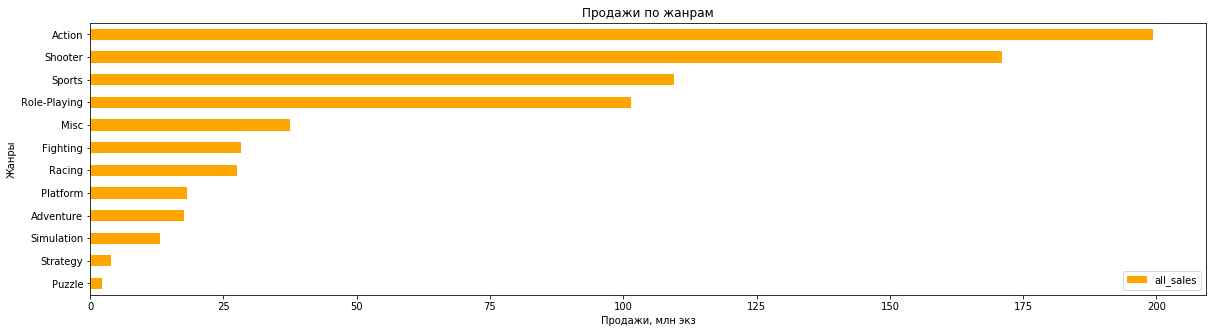

In [57]:
ax = genre_data.sort_values('all_sales').plot.barh(x='genre', y='all_sales', color='orange')
ax.set_title('Продажи по жанрам')
ax.set_xlabel('Продажи, млн экз')
ax.set_ylabel('Жанры')

#### Выводы: Наиболее прибыльными являются 4 жанра: это:
- Action;
- Shooter;
- Sports;
- Role-Playing.
Всё остальное существенно проигрывает этим 4м
---
- Strategy, Puzzle - канули в лета

### <span style="color:blue"> Шаг_4: Составим портрет пользователя каждого региона

#### 4.1. Рассмотрим ТОП-5 Платформ по регионам

In [58]:
# Возьмем данные за последние 3 года
good_data = data.query('year_of_release >=2014 and na_sales>0')

In [59]:
pvt_heat = good_data.pivot_table(
                index='year_of_release',
                columns='platform',
                values='all_sales',
                aggfunc=sum,
                fill_value=0)
pvt_heat

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,36.55,11.38,44.58,99.31,8.20,3.70,21.59,34.69,54.01
2015,19.85,6.73,14.20,116.44,1.72,1.10,16.21,11.83,59.96
2016,10.73,4.11,2.39,65.74,0.84,0.18,4.55,1.50,26.07


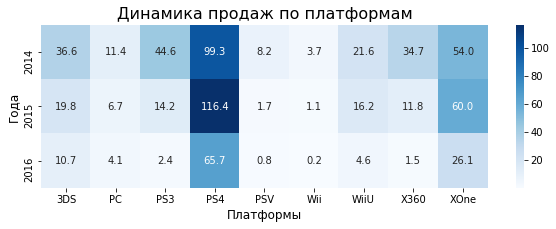

In [60]:
plt.figure(figsize=(10, 3))
ax = sns.heatmap(pvt_heat, annot=True, fmt=".1f", cmap="Blues")
ax.set_title('Динамика продаж по платформам', fontsize=16)
ax.set_xlabel('Платформы', fontsize=12)
ax.set_ylabel('Года', fontsize=12)
plt.show()

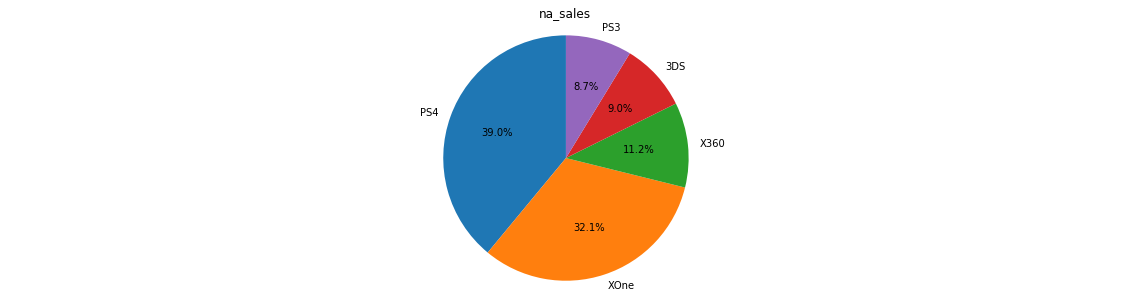

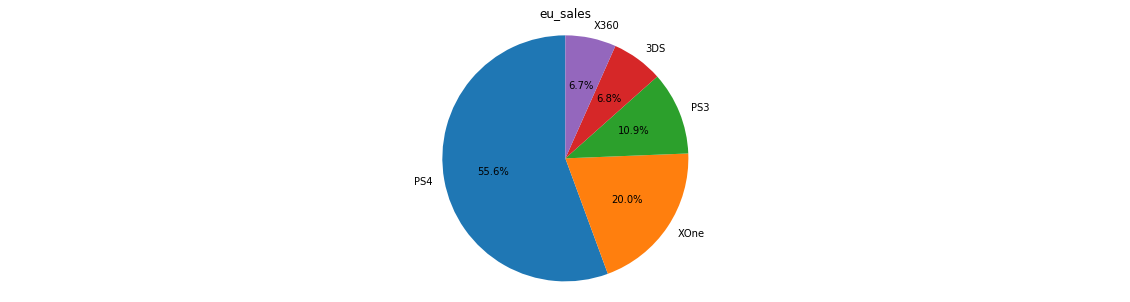

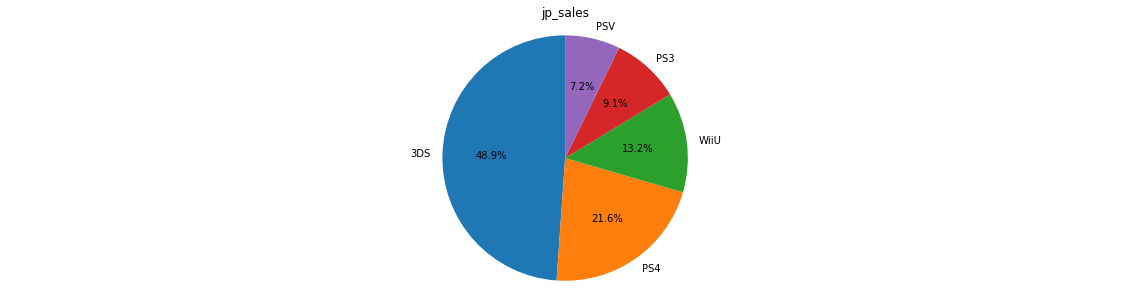

In [61]:
# создадим цикл, чтобы посмотреть на долевое распределение продаж по платформам внутри каждого региона
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    # группируем данные по платформам
    platform_by_region = (good_data
                   .pivot_table(index='platform', values=region, aggfunc='sum').copy()
                      .sort_values(by=region, ascending=False))
    # оставляем в датасете ТОП 5
    platform_by_region = platform_by_region.head()
    # строим круговую диаграмму для каждого региона
    labels = platform_by_region.index
    fig, ax = plt.subplots()
    ax.pie(platform_by_region[region], labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title(region)
    plt.show()

#### Распределение получилось совершенно разным для регионов
- Северная Америка - Лидер "PS4" - 39%, "XOne" - 32%, Остальные платформы в пределах 10%
- Европа - Лидер "PS4" - 55,1%, "XOne" - 19,6%, Остальные платформы в пределах 10%
- Япония - Лидер "3DS" - 47,9%, "PS4" - 16,3%, XOne" - совсем отсутствует, и по убыванию "PSV", "PS3", "WiiV=U"

#### 4.2. ТОП-5 Жанров

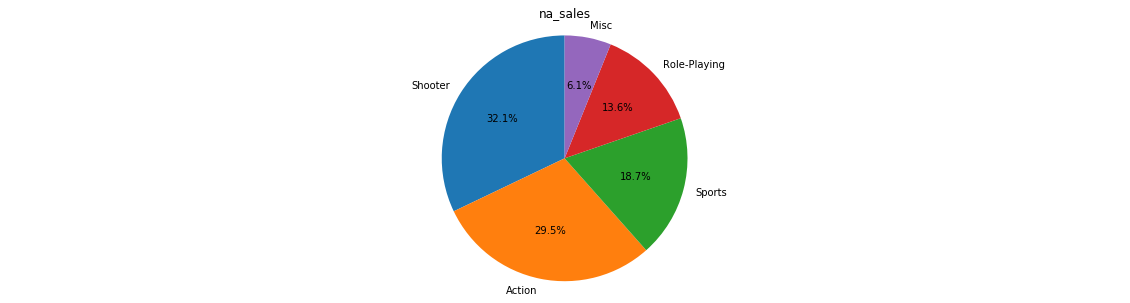

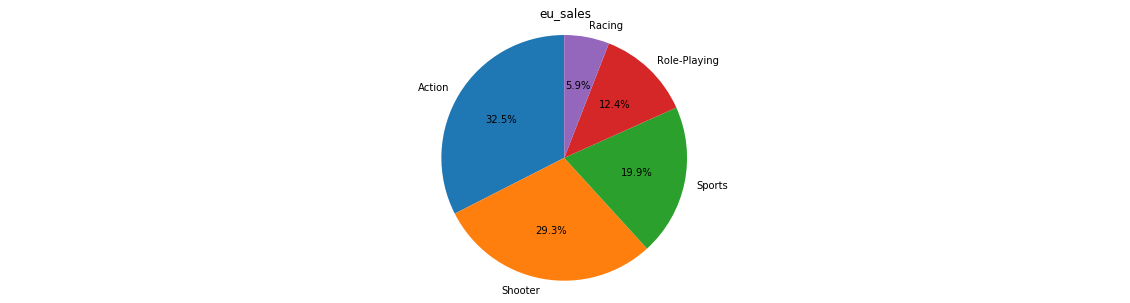

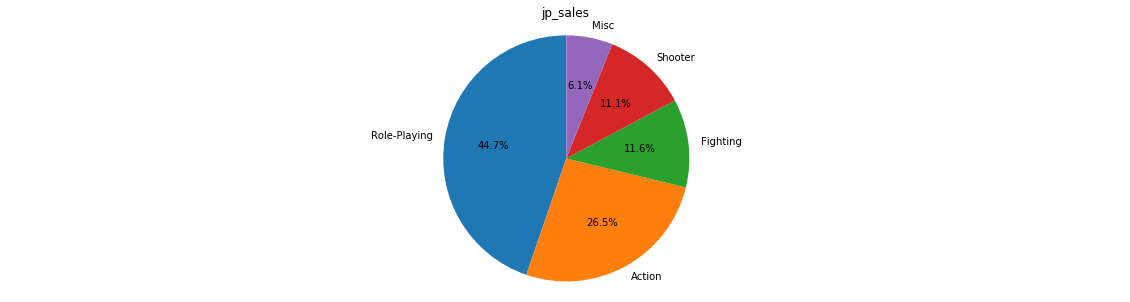

In [62]:
# Сделаем тоже самое с Жанрами
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    # группируем данные по жанрам
    genre_by_region = (good_data
                   .pivot_table(index='genre', values=region, aggfunc='sum').copy()
                      .sort_values(by=region, ascending=False))
    # оставляем в датасете ТОП 5
    genre_by_region = genre_by_region.head()
    # строим круговую диаграмму для каждого региона
    labels = genre_by_region.index
    fig, ax = plt.subplots()
    ax.pie(genre_by_region[region], labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title(region)
    plt.show()

#### И вновь как и с платформами в жанрах так же разные предпочтения, но в Европе и Сев Америке распределение похожее
- Сев Америка и Европа первые 3 места **Shooter, Action и Sports**
- В то время как в Японии большинство продаж в 2х жанрах: это **Role-Playing и Actoin**
---
- Скорее всего это связано с тем что на этих рынках совершенно разные лидеры в игровых платформах а так-же возможно у них разные предпочтения в жанрах

#### 4.3. Посмотрим на продажи и Рейтинг ESRB в разных регионах

In [63]:
good_data['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

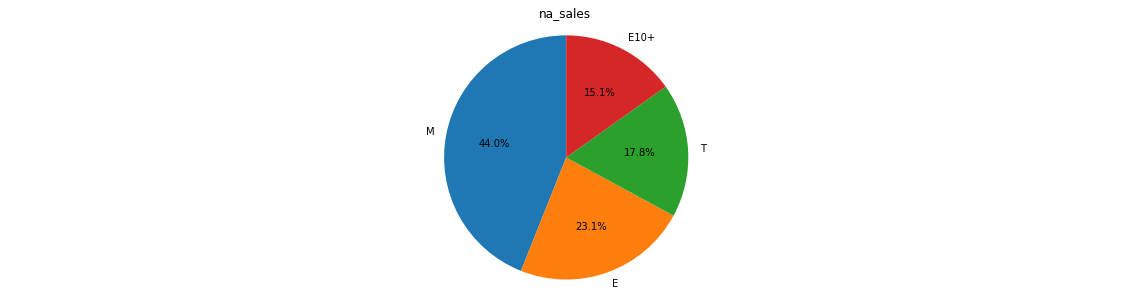

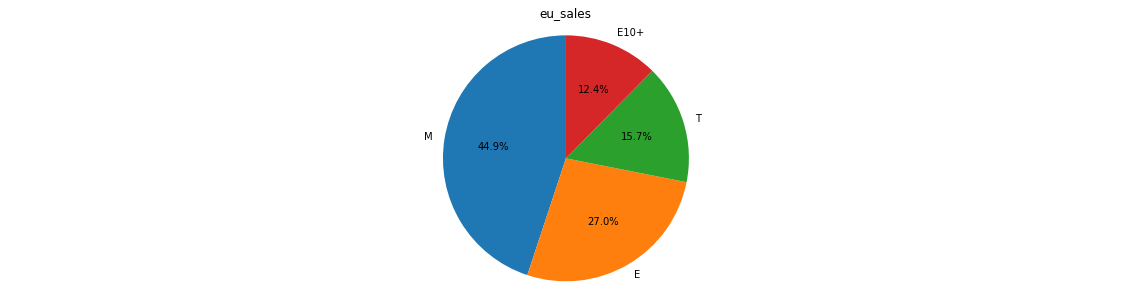

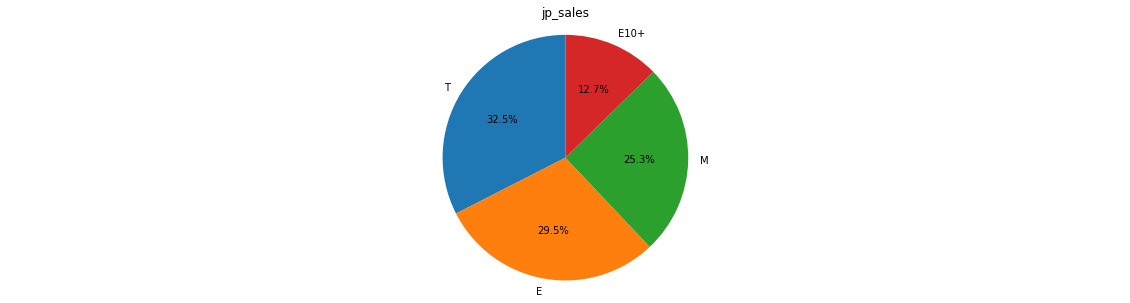

In [64]:
# Сделаем тоже самое с Рейтингом
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    # группируем данные по жанрам
    rating_by_region = (good_data
                    .query('rating == rating')    
                    .pivot_table(index='rating', values=region, aggfunc='sum').copy()
                    .sort_values(by=region, ascending=False))

    # строим круговую диаграмму для каждого региона
    labels = rating_by_region.index
    fig, ax = plt.subplots()
    ax.pie(rating_by_region[region], labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title(region)
    plt.show()

#### Описание возрастных ограничений	
- **E**	    «Everyone» — «Для всех»
- **M**	    «Mature» — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
- **T**     «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- **E10+**	«Everyone 10 and older» — «Для всех от 10 лет и старше»
- **K-A**	«Kids to Adults»
- **AO**	«Adults Only 18+» — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 
- **EC**	«Early childhood» - «Для детей младшего возраста»
- **RP**	«Rating Pending» — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.


#### Тут совсем интересно получается
- В Северной Америке и Европе основные потребители игр явяются взрослые люди от 18 лет
- В Японии же в основном играют Тинейджеры от 13 лет
- На втором месте во всех регионах со средней долей в 25% расположился сегмент "Для всех", т.е. без ограничений.

### Итоги Шага_4
1. Европа и Северная Америка имеют схожее распределения по Платформам, жанру и рейтингу, в то время как в Японии мы получаем совершенно другой рынок начиная от платформ и заканчивая тем что в игры там играют в основном Тинейджеры.

### <span style="color:blue"> Шаг_5: Проверим гипотезы

#### 5.1. Гипотеза первая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем нулевую гипотизу
- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - Средние рейтинги в этих платформах разные

In [65]:
# Формируем выборки по платформам Xbox One и PC
XOne_data = data.query('year_of_release >=2014 and platform == "XOne" and user_score>0')
PC_data = data.query('year_of_release >=2014 and platform == "PC" and user_score>0')

In [66]:
# Посмотрим на наши данные более подробно
data.query('year_of_release >=2014 and platform in ("XOne","PC") and user_score>0')\
    .groupby('platform')\
    .agg({'user_score': ['mean', 'median','count', 'max', 'min', 'var', 'std']})\
    .T\

platform                   PC        XOne
user_score mean      6.298361    6.594545
           median    6.800000    6.800000
           count   122.000000  165.000000
           max       9.300000    9.200000
           min       1.400000    1.600000
           var       2.901154    1.891007
           std       1.703278    1.375139

Данные по платформам вроде как идентичные, за исключением вариации и стандартного отклонения

In [67]:
# Возьмем уровень alpha = 0.05 что будет соответствовать 95% точности результата

alpha = .05

results = st.ttest_ind(
    XOne_data['user_score'],
    PC_data['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


#### Итоги по пункту 5.1. Так и есть не удалось отвергнуть нулевую гипотезу, данные практически идентичные
---

#### 5.2. Гипотеза вторая: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулируем нулевую гипотизу
- H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - Средние рейтинги в этих жанрах разные

In [68]:
# Формируем выборки по этим жанрам
Action_data = data.query('year_of_release >=2014 and genre == "Action" and user_score>0')
Sports_data = data.query('year_of_release >=2014 and genre == "Sports" and user_score>0')

In [69]:
# Посмотрим на наши данные более подробно
data.query('year_of_release >=2014 and genre in ("Action","Sports") and user_score>0')\
    .groupby('genre')\
    .agg({'user_score': ['mean', 'median','count', 'max', 'min', 'var', 'std']})\
    .T\

genre                  Action      Sports
user_score mean      6.760606    5.225197
           median    7.100000    5.500000
           count   297.000000  127.000000
           max       9.000000    8.800000
           min       2.000000    0.200000
           var       1.898477    3.446979
           std       1.377852    1.856604

Данные визуально разные. Проверим уровнь значимости

In [70]:
alpha = .05

results = st.ttest_ind(
    Action_data['user_score'],
    Sports_data['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


#### Итоги по пункту 5.2. Рейтинги жанров Action и Sports действительно разные

#### Обовнование выбора теста для проверки гипотезы такое:
- Т.к. мы предпологаем что пользователи в наших выборках разные будем использовать метод st.ttest_ind().
- Если бы мы сравнивали одних и тех же клиентов до и после, то нужно было-бы использовать scipy.stats.ttest_rel()
- И у нас не одна выборка а две. Для одной можно было-бы использовать метод: scipy.stats.ttest_1samp()

### <span style="color:blue"> Шаг_6: Общие итоги исследования
1. Пиковое значение продаж было отмечено в 2008 и 2009 году, после этого продажи начинают с каждым годом снижаться, тут видимо сказывается переход игроков в бесплатные игры с оплатой только за продвижение, но это не точно :)
2. Максимальная живучесть игровой платформы это 12 лет, кроме PC который имеет более или менее стабильные продажи;
3. Высокий потенциал развития у консоли PS4, она практически единственная которая показывает прирост год к году;
4. В основном игры продаются в кол-ве копий 75 000, но есть и сильные всплески в виде 82.5 млн;
5. Оценки пользователей совершенно не коррелируют с продажами, в то время как оценки Критиков коррелируют с продажами на уровне 0.4, возможно это связанно с тем что Критики делают свои оценки только по играм которые имеют хорошие продажи;
6. Наиболее прибыльными Жанрами игр являются:
- Action;
- Shooter;
- Sports;
- Role-Playing.
Всё остальное существенно проигрывает этим 4м;
7. Игровые рынки в Японии совершенно отличаются от рынков Северной Америки и Европы:
- Так в Северной Америке и Европе лидерами являются консоли: "PS4", "XOne", в то время как в Японии это "3DS";
- Пользователи игр в Северной Америке и Европе в основном взрослые люди от 18 лет, тогда как в Японии это Подростки;
- Жанр игр так же отличен Европа и Сев Америка это Shooter и Action, в то время как в Японии большинство продаж это Role-Playing;
8. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
9. Рейтинги жанров Action и Sports действительно разные